<a href="https://colab.research.google.com/github/MunirahHF/MyWork/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

# Analyzing the first dataset (cab_data)


In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab_data.drop_duplicates()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [6]:
cab_data.dropna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [7]:
#add 'Profit' column
cab_data['Profit'] = pd.DataFrame(cab_data["Price Charged"] - cab_data["Cost of Trip"])
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [8]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,1463.966000


In [9]:
cab_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [10]:
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [11]:
cab_data['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

In [12]:
cab_data['City'].value_counts()

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [13]:
#  convert the 'Date' column to datetime format
def real_date(x):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(x)
    return temp+delta

In [14]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:real_date(x))
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


# Analyzing the second dataset (customer_data)

In [15]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [17]:
customer_data.drop_duplicates()
customer_data.dropna()


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [18]:
customer_data['Gender'].value_counts()

Gender
Male      26562
Female    22609
Name: count, dtype: int64

# Analyzing the third dataset (transaction_data)

In [19]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [20]:
transaction_data.drop_duplicates()
transaction_data.dropna()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


# Analyzing the fourth dataset (city_data)

In [21]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [22]:
city_data.drop_duplicates()
city_data.dropna()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [23]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [24]:
# convetr 'Population' type
city_data['Population'] = [x.replace(',','') for x in city_data['Population']]
city_data['Population'] = city_data['Population'].astype(float)

# convert 'Users' type
city_data['Users'] = [x.replace(',','') for x in city_data['Users']]
city_data['Users'] = city_data['Users'].astype(float)

In [25]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


# Merge the datasest

In [26]:
# Perform the merge
df= cab_data.merge(transaction_data, on= 'Transaction ID').merge(customer_data, on ='Customer ID').merge(city_data, on = 'City')
df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885.0,24701.0


In [27]:
#price per KM of travel
df.insert(loc=9,
          column='Price per KM',
          value=df['Price Charged'] / df['KM Travelled'])

In [28]:
#profit per KM of travel
df.insert(loc=10,
          column='profit per KM',
          value=df['Profit'] / df['KM Travelled'])
df.head(5)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Price per KM,profit per KM,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,12.182266,1.882266,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,22.859870,10.739870,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,18.614571,4.574571,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,12.526904,0.826904,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,19.821330,6.981330,Card,Male,27,9237,814885.0,24701.0


In [29]:
num_rides = df['Customer ID'].value_counts().rename_axis('Customer ID').reset_index(name='Number of Rides')
df = pd.merge(df, num_rides, on='Customer ID')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Price per KM,profit per KM,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Number of Rides
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,12.182266,1.882266,Card,Male,28,10813,814885.0,24701.0,3
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,22.859870,10.739870,Cash,Male,28,10813,814885.0,24701.0,3
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,18.614571,4.574571,Card,Male,28,10813,814885.0,24701.0,3
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,12.526904,0.826904,Card,Male,27,9237,814885.0,24701.0,4
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,19.821330,6.981330,Card,Male,27,9237,814885.0,24701.0,4


In [30]:
# Extract the year and create a new column
df['Year of Travel'] = df['Date of Travel'].dt.year
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Price per KM,profit per KM,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Number of Rides,Year of Travel
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,12.182266,1.882266,Card,Male,28,10813,814885.0,24701.0,3,2016
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,22.859870,10.739870,Cash,Male,28,10813,814885.0,24701.0,3,2018
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,18.614571,4.574571,Card,Male,28,10813,814885.0,24701.0,3,2018
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,12.526904,0.826904,Card,Male,27,9237,814885.0,24701.0,4,2016
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,19.821330,6.981330,Card,Male,27,9237,814885.0,24701.0,4,2018


In [31]:
df['Month of Travel'] = df['Date of Travel'].dt.month
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Price per KM,profit per KM,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Number of Rides,Year of Travel,Month of Travel
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,12.182266,1.882266,Card,Male,28,10813,814885.0,24701.0,3,2016,1
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,22.859870,10.739870,Cash,Male,28,10813,814885.0,24701.0,3,2018,7
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,18.614571,4.574571,Card,Male,28,10813,814885.0,24701.0,3,2018,11
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,12.526904,0.826904,Card,Male,27,9237,814885.0,24701.0,4,2016,1
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,19.821330,6.981330,Card,Male,27,9237,814885.0,24701.0,4,2018,4


# Visualisation

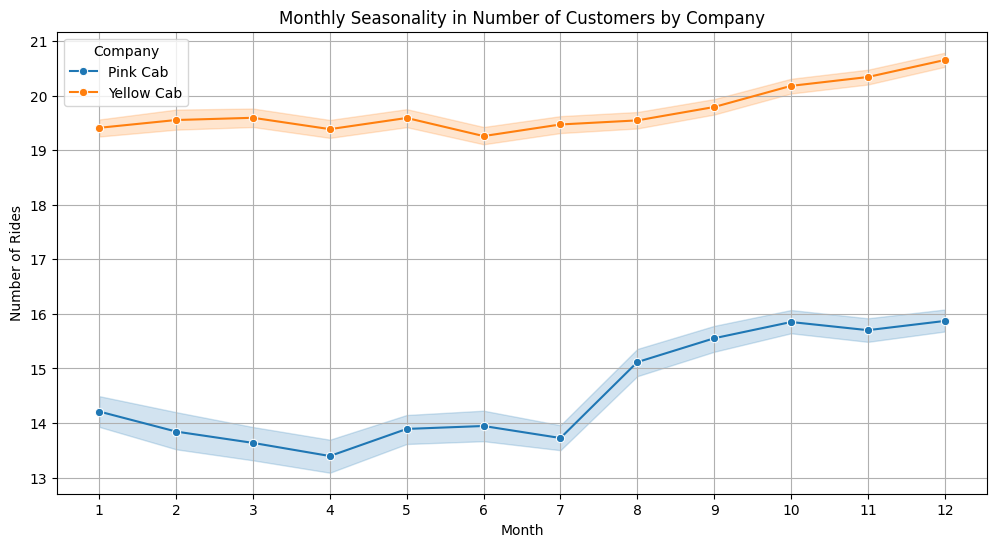

In [32]:
# 1. Seasonality in Number of Customers by Company (Monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month of Travel', y='Number of Rides', hue='Company', marker='o', palette='tab10')
plt.title('Monthly Seasonality in Number of Customers by Company')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend(title='Company')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

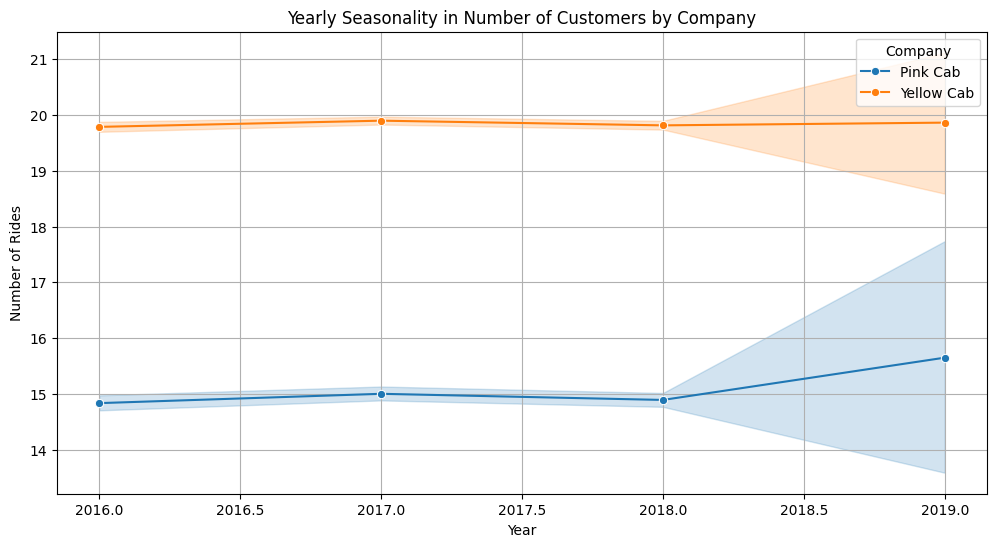

In [33]:
# 2. Seasonality in Number of Customers by Company (Yearly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year of Travel', y='Number of Rides', hue='Company', marker='o', palette='tab10')
plt.title('Yearly Seasonality in Number of Customers by Company')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.legend(title='Company')
plt.grid(True)
plt.show()

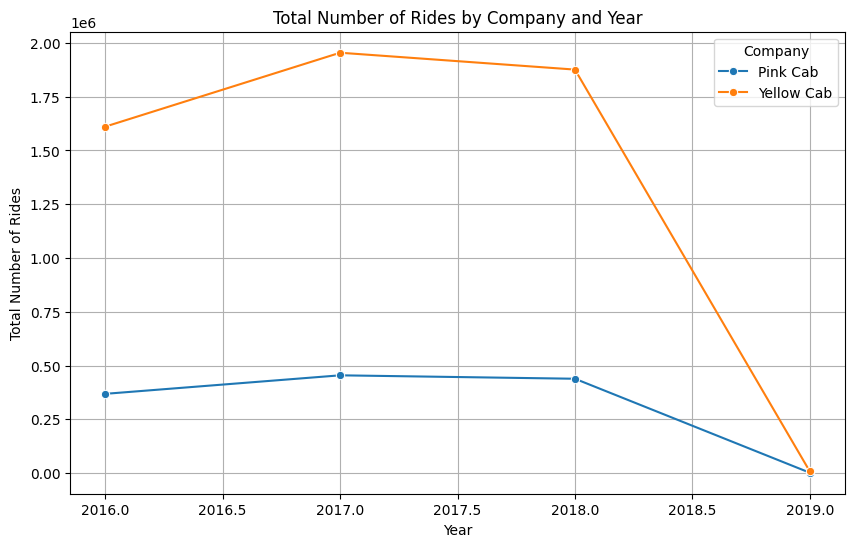

In [34]:
# 3. Total Number of Rides by Company and Year
total_rides_by_year = df.groupby(['Year of Travel', 'Company'])['Number of Rides'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_rides_by_year, x='Year of Travel', y='Number of Rides', hue='Company', marker='o', palette='tab10')
plt.title('Total Number of Rides by Company and Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Rides')
plt.legend(title='Company')
plt.grid(True)

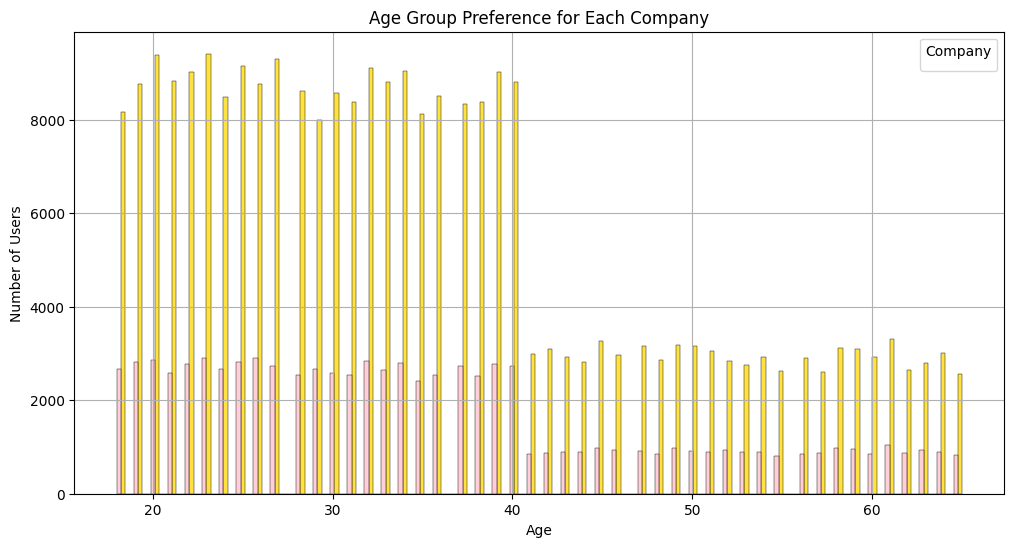

In [35]:
# 4. Age Group Preference for Each Company
company_colors = {'Yellow Cab': '#FFD700', 'Pink Cab': '#FFC0CB'}

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Company', multiple='dodge', palette=company_colors)
plt.title('Age Group Preference for Each Company')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.legend(title='Company')
plt.grid(True)
plt.show()


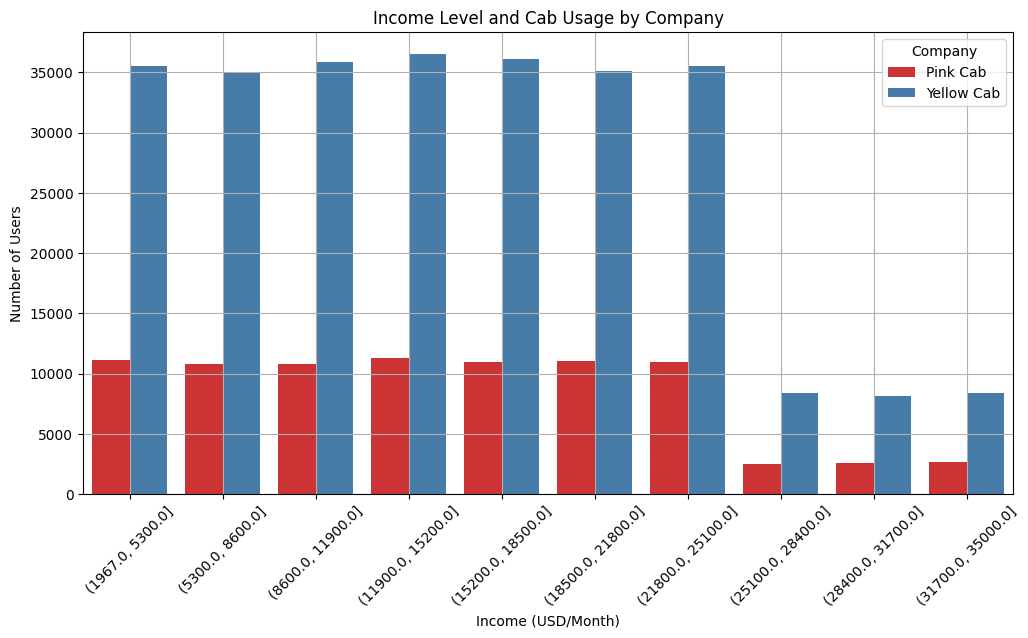

In [36]:
# 5. Income Level and Cab Usage by Company
plt.figure(figsize=(12, 6))
income_bins = pd.cut(df['Income (USD/Month)'], bins=10)
sns.countplot(data=df, x=income_bins, hue='Company', palette='Set1')
plt.title('Income Level and Cab Usage by Company')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Number of Users')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

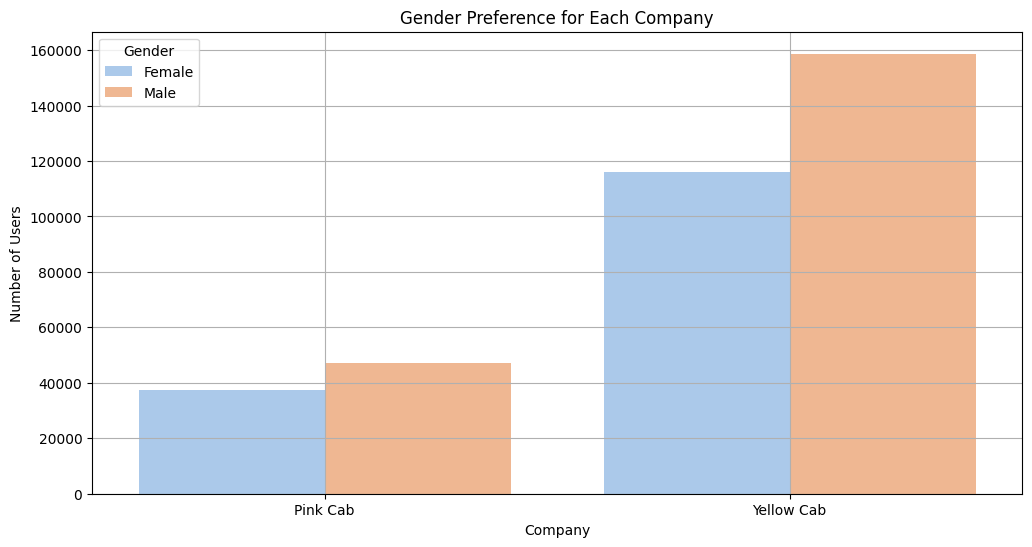

In [37]:
# 6. Gender Preference for Each Company
plt.figure(figsize=(12, 6))
df_gender = df.groupby(['Company', 'Gender']).size().reset_index(name='counts')
sns.barplot(data=df_gender, x='Company', y='counts', hue='Gender', palette='pastel')
plt.title('Gender Preference for Each Company')
plt.xlabel('Company')
plt.ylabel('Number of Users')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

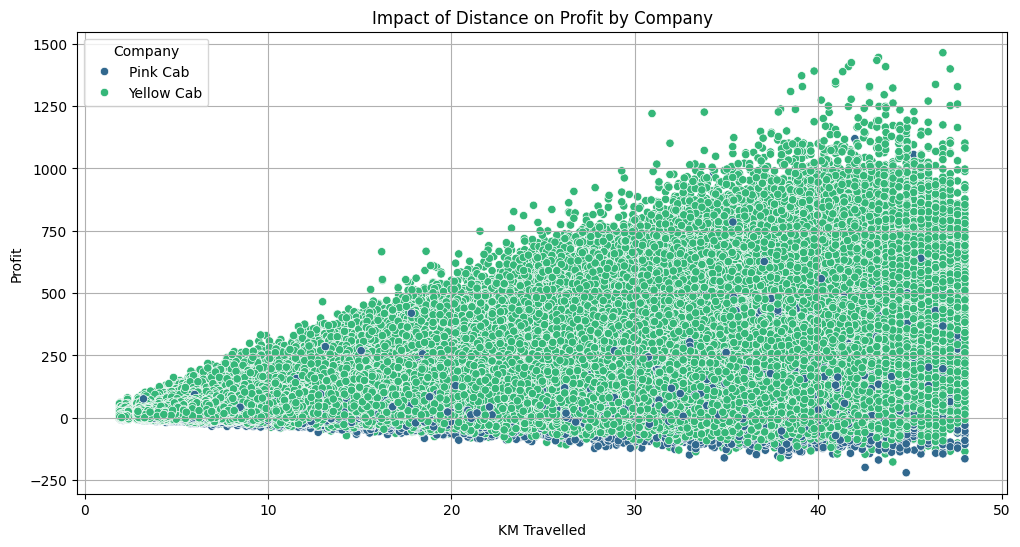

In [38]:
# 7. Impact of Distance on Profit by Company
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='KM Travelled', y='Profit', hue='Company', palette='viridis')
plt.title('Impact of Distance on Profit by Company')
plt.xlabel('KM Travelled')
plt.ylabel('Profit')
plt.legend(title='Company')
plt.grid(True)
plt.show()

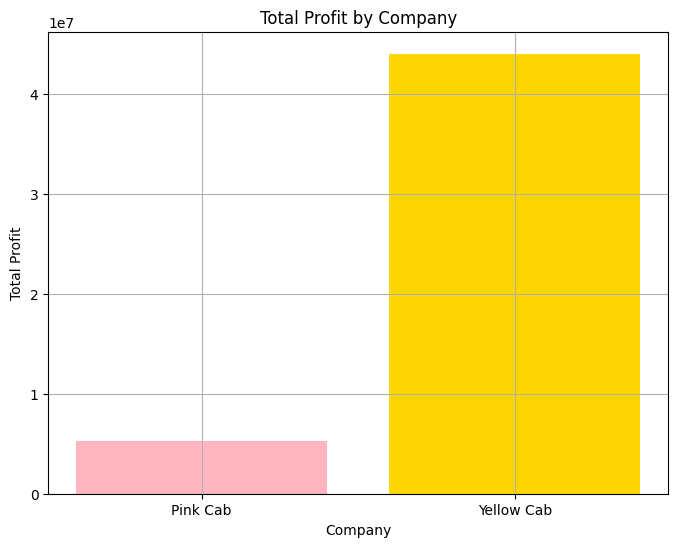

In [39]:
# 8. Total Profit by Company
total_profit_by_company = df.groupby('Company')['Profit'].sum().reset_index()
colors = ['#FFB6C1', '#FFD700']
plt.figure(figsize=(8, 6))
plt.bar(total_profit_by_company['Company'], total_profit_by_company['Profit'], color=colors)
plt.title('Total Profit by Company')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

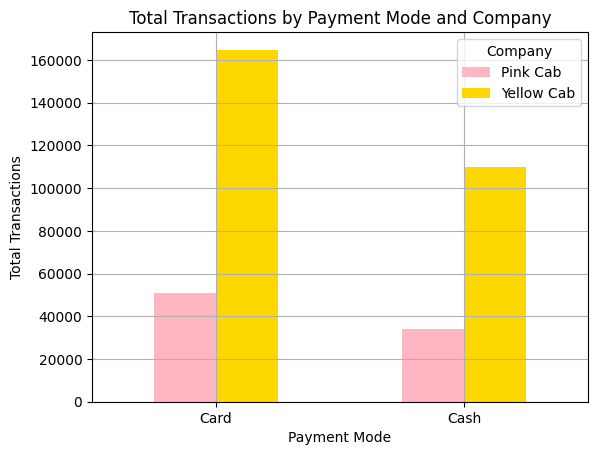

In [40]:
# 9. Total Transactions by Payment Mode and Company

total_transactions = df.groupby(['Company', 'Payment_Mode']).size().reset_index(name='Total Transactions')

total_transactions_pivot = total_transactions.pivot(index='Payment_Mode', columns='Company', values='Total Transactions').fillna(0)

plt.figure(figsize=(10, 6))
total_transactions_pivot.plot(kind='bar', color=colors)
plt.title('Total Transactions by Payment Mode and Company')
plt.xlabel('Payment Mode')
plt.ylabel('Total Transactions')
plt.legend(title='Company', labels=['Pink Cab', 'Yellow Cab'])
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Number of Customers in Cities by Company')

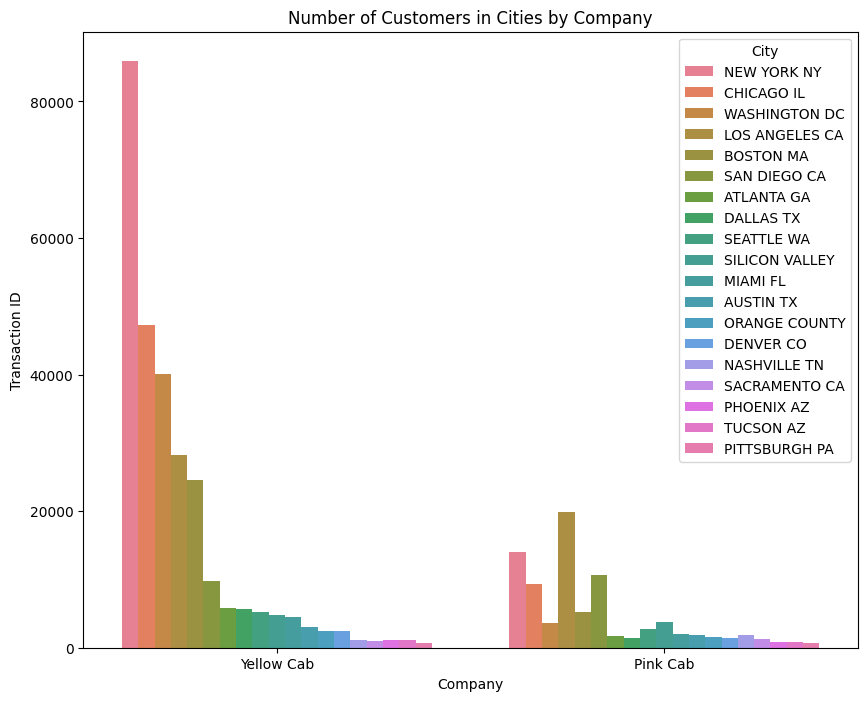

In [41]:
# 10. Number of Customers in Cities by Company
plt.figure(figsize=(10,8))
group = df.groupby(['Company','City'])['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x="Company", hue="City", y='Transaction ID')
plt.title("Number of Customers in Cities by Company")

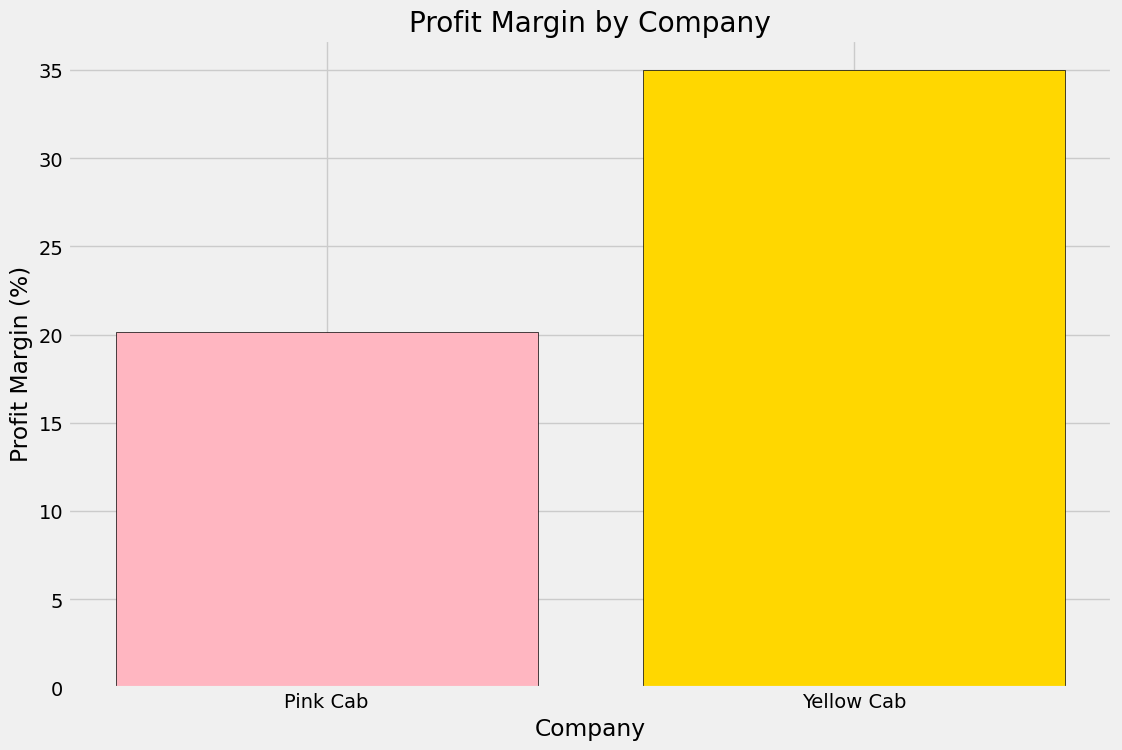

In [42]:
# 11. Profit Margin by Company
# Calculate average price charged and cost of trip by company
company_stats = df.groupby('Company').agg({'Price Charged': 'mean', 'Cost of Trip': 'mean'})

# Calculate profit margin as a percentage
company_stats['Profit Margin (%)'] = ((company_stats['Price Charged'] - company_stats['Cost of Trip']) / company_stats['Price Charged']) * 100

# Plotting the profit margin
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
plt.bar(company_stats.index, company_stats['Profit Margin (%)'], color=['#FFB6C1', '#FFD700'], edgecolor='black')
plt.title('Profit Margin by Company')
plt.xlabel('Company')
plt.ylabel('Profit Margin (%)')
plt.grid(True)
plt.show()

#Hypothesis


Hypothesis 1: Average Profit Margin Comparison

Hypothesis: The average profit margin of Yellow Cab is higher than that of Pink Cab.

In [43]:
from scipy import stats
# Calculate average profit margin for Pink Cab and Yellow Cab
avg_profit_margin_pink = df[df['Company'] == 'Pink Cab']['Profit'] / df[df['Company'] == 'Pink Cab']['Price Charged']
avg_profit_margin_yellow = df[df['Company'] == 'Yellow Cab']['Profit'] / df[df['Company'] == 'Yellow Cab']['Price Charged']

# Perform two-sample t-test
_, p_value = stats.ttest_ind(avg_profit_margin_pink, avg_profit_margin_yellow, equal_var=True)

print('P value is ', p_value)

if p_value < 0.05:
    print('We reject the null hypothesis: There is a significant difference in average profit margin between Pink Cab and Yellow Cab.')
else:
    print('We accept the null hypothesis: There is no significant difference in average profit margin between Pink Cab and Yellow Cab.')

P value is  0.0
We reject the null hypothesis: There is a significant difference in average profit margin between Pink Cab and Yellow Cab.


Hypothesis 2: Weekdays vs. Weekends Usage

Hypothesis: There is a significant difference in the number of rides between weekdays and weekends for both Pink Cab and Yellow Cab.

In [44]:
# Filter data for weekdays and weekends
weekdays_data_pink = df[(df['Company'] == 'Pink Cab') & df['Date of Travel'].dt.weekday.isin([0, 1, 2, 3, 4])]['Number of Rides']
weekends_data_pink = df[(df['Company'] == 'Pink Cab') & df['Date of Travel'].dt.weekday.isin([5, 6])]['Number of Rides']
weekdays_data_yellow = df[(df['Company'] == 'Yellow Cab') & df['Date of Travel'].dt.weekday.isin([0, 1, 2, 3, 4])]['Number of Rides']
weekends_data_yellow = df[(df['Company'] == 'Yellow Cab') & df['Date of Travel'].dt.weekday.isin([5, 6])]['Number of Rides']

# Perform two-sample t-tests
_, p_value_pink = stats.ttest_ind(weekdays_data_pink, weekends_data_pink, equal_var=True)
_, p_value_yellow = stats.ttest_ind(weekdays_data_yellow, weekends_data_yellow, equal_var=True)

print('P value (Pink Cab) is ', p_value_pink)
print('P value (Yellow Cab) is ', p_value_yellow)

if p_value_pink < 0.05:
    print('We reject the null hypothesis for Pink Cab: There is a significant difference in rides between weekdays and weekends.')
else:
    print('We accept the null hypothesis for Pink Cab: There is no significant difference in rides between weekdays and weekends.')

if p_value_yellow < 0.05:
    print('We reject the null hypothesis for Yellow Cab: There is a significant difference in rides between weekdays and weekends.')
else:
    print('We accept the null hypothesis for Yellow Cab: There is no significant difference in rides between weekdays and weekends.')

P value (Pink Cab) is  0.2017634912847471
P value (Yellow Cab) is  0.14969354943135718
We accept the null hypothesis for Pink Cab: There is no significant difference in rides between weekdays and weekends.
We accept the null hypothesis for Yellow Cab: There is no significant difference in rides between weekdays and weekends.


Hypothesis 3: Income Level and Cab Usage

Hypothesis: Customers with higher incomes tend to use Yellow Cab more frequently than Pink Cab.

In [45]:
# Filter data by income level and company
high_income_pink = df[(df['Company'] == 'Pink Cab') & (df['Income (USD/Month)'] > df['Income (USD/Month)'].quantile(0.75))]['Transaction ID']
high_income_yellow = df[(df['Company'] == 'Yellow Cab') & (df['Income (USD/Month)'] > df['Income (USD/Month)'].quantile(0.75))]['Transaction ID']

# Count number of transactions for high income customers
count_high_income_pink = high_income_pink.nunique()
count_high_income_yellow = high_income_yellow.nunique()

print('Number of high income customers - Pink Cab:', count_high_income_pink)
print('Number of high income customers - Yellow Cab:', count_high_income_yellow)

# Perform hypothesis testing (proportions z-test)
from statsmodels.stats.proportion import proportions_ztest

count_pink = df[df['Company'] == 'Pink Cab']['Transaction ID'].nunique()
count_yellow = df[df['Company'] == 'Yellow Cab']['Transaction ID'].nunique()

stat, p_value = proportions_ztest([count_high_income_pink, count_high_income_yellow], [count_pink, count_yellow])

print('P value is ', p_value)

if p_value < 0.05:
    print('We reject the null hypothesis: There is a significant difference in high income customer usage between Pink Cab and Yellow Cab.')
else:
    print('We accept the null hypothesis: There is no significant difference in high income customer usage between Pink Cab and Yellow Cab.')


Number of high income customers - Pink Cab: 21261
Number of high income customers - Yellow Cab: 68551
P value is  0.40500754487907387
We accept the null hypothesis: There is no significant difference in high income customer usage between Pink Cab and Yellow Cab.


Hypothesis 4: Age Group Preferences

Hypothesis: There are age group preferences that differ significantly between Pink Cab and Yellow Cab.

In [48]:
from scipy.stats import chi2_contingency
# Perform chi-square test for independence on age groups and company
observed = pd.crosstab(df['Age'], df['Company'])
chi2, p_value, _, _ = chi2_contingency(observed)

print('P value is ', p_value)

if p_value < 0.05:
    print('We reject the null hypothesis: There is a significant difference in age group preferences between Pink Cab and Yellow Cab.')
else:
    print('We accept the null hypothesis: There is no significant difference in age group preferences between Pink Cab and Yellow Cab.')


P value is  4.2475625434269727e-07
We reject the null hypothesis: There is a significant difference in age group preferences between Pink Cab and Yellow Cab.


Hypothesis 5: Effect of Population Density on Usage

Hypothesis: There is a correlation between population density in cities and the number of rides for Yellow Cab.

In [47]:
# Calculate correlation between population and number of rides for Yellow Cab
yellow_cab_data = df[df['Company'] == 'Yellow Cab']
correlation = yellow_cab_data['Population'].corr(yellow_cab_data['Number of Rides'])

print('Correlation between Population and Number of Rides for Yellow Cab:', correlation)

# Perform hypothesis testing for correlation
from scipy.stats import pearsonr

r, p_value = pearsonr(yellow_cab_data['Population'], yellow_cab_data['Number of Rides'])

print('P value is ', p_value)

if p_value < 0.05:
    print('We reject the null hypothesis: There is a significant correlation between population density and number of rides for Yellow Cab.')
else:
    print('We accept the null hypothesis: There is no significant correlation between population density and number of rides for Yellow Cab.')


Correlation between Population and Number of Rides for Yellow Cab: 0.8496096914969222
P value is  0.0
We reject the null hypothesis: There is a significant correlation between population density and number of rides for Yellow Cab.


Based on the previous analysis, it's clear that Yellow Cab did better.


So, I confidently recommend Yellow Cab as the better investment.